No circles detected.


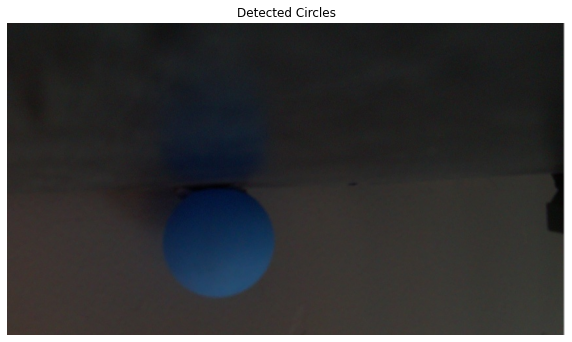

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (adjust the path if needed)
img = cv2.imread('/home/rober/rpi/sockets/test.png')
if img is None:
    print("Failed to open image.png")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply a Gaussian blur to reduce noise and improve circle detection.
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)
    
    # Detect circles in the image using the Hough Circle Transform.
    # Adjust dp, minDist, param1, param2, and minRadius based on your image.
    circles = cv2.HoughCircles(blurred, 
                               cv2.HOUGH_GRADIENT, 
                               dp=1.2, 
                               minDist=50, 
                               param1=100, 
                               param2=30, 
                               minRadius=10, 
                               maxRadius=0)
    
    # If some circles are detected, draw them on the image.
    if circles is not None:
        # Round the circle parameters and cast to int.
        circles = np.round(circles[0, :]).astype("int")
        print("Detected circles:", circles)
        # Loop over the detected circles.
        for (x, y, r) in circles:
            # Draw the circle's outline in green.
            cv2.circle(img, (x, y), r, (0, 255, 0), 2)
            # Draw the circle's center in red.
            cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
    else:
        print("No circles detected.")

    # Convert the image from BGR to RGB so that it displays correctly with matplotlib.
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image.
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Detected Circles")
    plt.show()


In [21]:
roi=img
frame=img

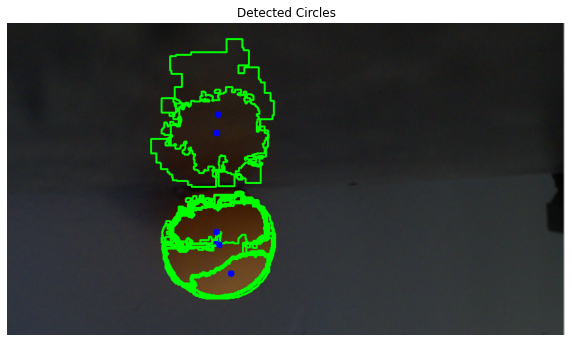

In [22]:
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
lower_orange = np.array([90, 10, 30])
upper_orange = np.array([110, 250, 200])
mask = cv2.inRange(roi_hsv, lower_orange, upper_orange)

# Clean up the mask.
kernel = np.ones((12, 12), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel, iterations=1)

# Find contours in the mask.
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

largest_centroid = None
distance = None
largest_area = 0
chosen_contour = None

for contour in contours:
    area = cv2.contourArea(contour)
    if area > 10000 and area > largest_area:
        largest_area = area
        chosen_contour = contour

if chosen_contour is not None:
    (x_center, y_center), radius = cv2.minEnclosingCircle(chosen_contour)
    centroid = (int(x_center), int(y_center))
    largest_centroid = centroid
    cv2.drawContours(frame, [chosen_contour], -1, (0, 255, 0), 2)
    cv2.circle(frame, centroid, 5, (0, 0, 255), -1)
    #if radius > 0:
    #    distance = BALL_DIAMETER / (2 * radius * PIXEL_PITCH)
    
plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.axis('off')
plt.title("Detected Circles")
plt.show()


Number of contours found in ROI: 4


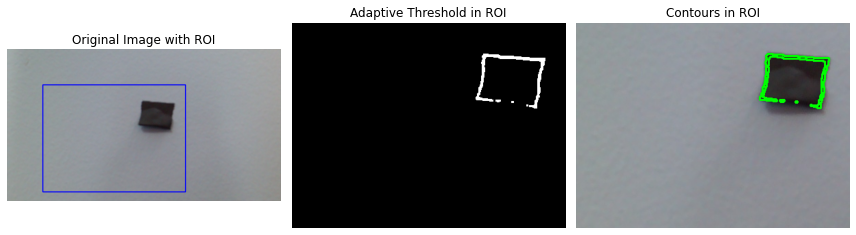

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (adjust the path if needed)
img = cv2.imread('DO.png')
if img is None:
    print("Failed to load image.png")
else:
    # Define ROI coordinates: x1, x2, y1, y2.
    # For example, here we choose an ROI from (x1=100, y1=100) to (x2=500, y2=400).
    x1, y1 = 100, 100
    x2, y2 = 500, 400
    
    # Make a copy of the original image to draw the ROI rectangle.
    img_with_roi = img.copy()
    cv2.rectangle(img_with_roi, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    # Extract the ROI from the image.
    roi = img[y1:y2, x1:x2]
    
    # Convert the ROI to grayscale.
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive threshold with THRESH_BINARY_INV.
    thresh_roi = cv2.adaptiveThreshold(
        gray_roi,
        maxValue=255,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
        thresholdType=cv2.THRESH_BINARY_INV,
        blockSize=11,
        C=7
    )
    
    # Optionally clean up noise with a morphological opening.
    kernel = np.ones((3, 3), np.uint8)
    thresh_clean = cv2.morphologyEx(thresh_roi, cv2.MORPH_OPEN, kernel, iterations=1)
    
    # Find contours in the cleaned threshold image (only in the ROI).
    contours, hierarchy = cv2.findContours(thresh_clean.copy(), 
                                           cv2.RETR_EXTERNAL, 
                                           cv2.CHAIN_APPROX_SIMPLE)
    print("Number of contours found in ROI:", len(contours))
    
    # Create a copy of the ROI to draw detected contours.
    roi_contours = roi.copy()
    cv2.drawContours(roi_contours, contours, -1, (0, 255, 0), 2)
    
    # Draw bounding boxes for large contours (for debugging).
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 1000:  # Adjust the threshold based on what you define as "large"
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(roi_contours, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    # Display the results.
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title("Original Image with ROI")
    # Convert BGR to RGB for matplotlib.
    plt.imshow(cv2.cvtColor(img_with_roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("Adaptive Threshold in ROI")
    plt.imshow(thresh_clean, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("Contours in ROI")
    plt.imshow(cv2.cvtColor(roi_contours, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

